### 필요한 라이브러리를 불러오고 시작

In [1]:
import os
import time
import threading
from pymycobot.mycobot import MyCobot
from pymycobot.genre import Angle, Coord

### 로봇 연결

In [2]:
mc = MyCobot('/dev/ttyJETCOBOT', 1000000)
mc.thread_lock = True
print("로봇이 연결되었습니다.")

로봇이 연결되었습니다.


# 로봇의 현재 데이터 읽기

In [21]:
# 현재 각도 읽기
angles = mc.get_angles()
print("현재 각도:", angles)

# 현재 좌표 읽기
coords = mc.get_coords()
print("현재 좌표:", coords)

# 인코더 값 읽기
encoders = mc.get_encoders()
print("인코더:", encoders)

# 라디안 값 읽기
radians = mc.get_radians()
print("라디안:", radians)

현재 각도: [38.05, 12.12, -33.57, -70.13, -0.7, -51.94]
현재 좌표: [106.1, 0.2, 277.9, 178.47, 0.81, 0.0]
인코더: [1615, 1910, 1666, 2846, 2056, 2639]
라디안: [0.664, 0.212, -0.586, -1.224, -0.012, -0.907]


### 각 조인트의 동작 범위 확인하기

In [5]:
ANGLE_MIN = [-168, -135, -150, -145, -165, -180, 0]
ANGLE_MAX = [168, 135, 150, 145, 165, 180, 100]

for i in range(7):
    print(f"관절 {i+1}: {ANGLE_MIN[i]} ~ {ANGLE_MAX[i]}도")

관절 1: -168 ~ 168도
관절 2: -135 ~ 135도
관절 3: -150 ~ 150도
관절 4: -145 ~ 145도
관절 5: -165 ~ 165도
관절 6: -180 ~ 180도
관절 7: 0 ~ 100도


### 로봇을 초기 위치로 이동

In [3]:
# 로봇을 초기 위치로 리셋
initial_angles = [0, 0, 0, 0, 0, 0]
speed = 50
print("로봇을 초기 위치로 리셋합니다.")
mc.send_angles(initial_angles, speed)
mc.set_gripper_value(100, speed) # 그리퍼 열기
time.sleep(3) # 움직임이 완료될 때까지 대기
print("리셋 완료")

로봇을 초기 위치로 리셋합니다.
리셋 완료


### 단일 관절 각도 움직이기
* send_angle(조인트 번호, 목표 각도, 속도)

In [20]:
# 관절 1(베이스)을 30도로 이동
joint_id = Angle.J1.value
angle = 30
speed = 50
# 관절 1 (베이스)
print(f"관절 {joint_id}를 {angle}도로 이동합니다.")
mc.send_angle(joint_id, angle, speed)
time.sleep(2) # 움직임이 완료될 때까지 대기
# 관절 1을 다시 0도로 복귀
print(f"관절 {joint_id}를 0도로 복귀합니다.")
mc.send_angle(joint_id, 0, speed)
time.sleep(2) # 움직임이 완료될 때까지 대기

관절 1를 30도로 이동합니다.
관절 1를 0도로 복귀합니다.


### 모든 관절 각도 움직이기
* send_angles(목표 각도 List, 속도)

In [19]:
# 모든 관절을 지정된 각도로 이동
target_angles = [20, 20, -20, 20, 20, -45]
speed = 50

print(f"모든 관절을 {target_angles}로 이동합니다.")
mc.send_angles(target_angles, speed)
time.sleep(3) # 움직임이 완료될 때까지 대기

# 초기 위치로 복귀
print("초기 위치로 복귀합니다.")
mc.send_angles([0, 0, 0, 0, 0, 0], speed)
time.sleep(3) # 움직임이 완료될 때까지 대기

모든 관절을 [20, 20, -20, 20, 20, -45]로 이동합니다.
초기 위치로 복귀합니다.


### 좌표로 로봇 제어하기
* send_coords(목표 좌표 List, 속도, 모드)

In [3]:
# 현재 좌표 확인
current_coords = mc.get_coords()
print("현재 좌표:", current_coords)

# # 1. 먼저 Z축을 낮추기
# work_coords = current_coords.copy()
# work_coords[2] -= 50 # Z를 50mm 내리기
# print(f"Z축을 {work_coords[2]}로 내립니다.")
# mc.send_coords(work_coords, 30, 0)
# time.sleep(2)

# # 2. X 좌표 이동
# x_coords = work_coords.copy()
# x_coords[0] += 50 # X + 50mm
# print(f"X 좌표를 {x_coords[0]}로 이동합니다.")
# mc.send_coords(x_coords, 30, 0)
# time.sleep(2)

# 3. Y 좌표 이동
# y_coords = x_coords.copy()
# y_coords[1] += 50 # Y - 20mm
# print(f"Y 좌표를 {y_coords[1]}로 이동합니다.")
# mc.send_coords(y_coords, 30, 0)
# time.sleep(2)

# 4. 최종 좌표 확인
final_coords = mc.get_coords()
print("최종 좌표:", final_coords)

# 5. 초기 위치로 복귀
print("초기 위치로 복귀합니다.")
mc.send_angles([0, 0, 0, 0, 0, 0], 50)
time.sleep(2)
mc.send_angles([90, 0, -45, -45, 0, 0], 50)
time.sleep(2)
mc.set_gripper_value(100, 50)
time.sleep(2)
print("초기 위치 복귀 완료")

현재 좌표: [-181.8, -58.3, 321.1, -45.95, -25.9, -11.04]
최종 좌표: [-181.8, -58.3, 321.1, -45.95, -25.9, -11.04]
초기 위치로 복귀합니다.
초기 위치 복귀 완료


In [29]:
mc.get_coords()
print(mc.get_coords())  # [x, y, z, rx,print(res.get("tvec")) ry, rz]

[66.1, 146.0, 250.7, 175.4, 0.3, -3.54]


NameError: name 'res' is not defined

### 모든 좌표로 한번에 이동
* IK를 풀 수 있을 경우에만 이동한다.

In [ ]:
# 현재 좌표 확인
current_coords = mc.get_coords()
print("현재 좌표:", current_coords)

# 목표 좌표 설정 (현재 위치 기준에서 변경)
target_coords = current_coords.copy()
target_coords[0] += 30 # X + 30mm
target_coords[1] -= 30 # Y - 30mm
target_coords[2] -= 50 # Z - 50mm

print(f"목표 좌표로 이동합니다: {target_coords}")
mc.send_coords(target_coords, 50, 0)
time.sleep(3)

# 초기 좌표로 복귀
print("초기 위치로 복귀합니다.")
mc.send_angles([0, 0, 0, 0, 0, 0], 50)

현재 좌표: [119.7, -126.0, 306.3, -92.38, 1.65, -89.5]
목표 좌표로 이동합니다: [149.7, -156.0, 256.3, -92.38, 1.65, -89.5]
초기 위치로 복귀합니다.


-1

### 그리퍼 제어
* 무언가를 집어야한다면 그냥 완전히 닫으면 닫기

In [68]:
# # 그리퍼 완전히 열기
# print("그리퍼를 완전히 엽니다.")
# mc.set_gripper_value(100, 50)
# time.sleep(1)

# 그리퍼 반쯤 닫기
print("그리퍼를 반쯤 닫습니다.")
mc.set_gripper_value(50, 50)
time.sleep(1)

# # 그리퍼 더 닫기
# print("그리퍼를 더 닫습니다.")
# mc.set_gripper_value(30, 50)
# time.sleep(1)

# 그리퍼 완전히 닫기
# print("그리퍼를 완전히 닫습니다.")
# mc.set_gripper_value(0, 50)
# time.sleep(1)

# 그리퍼 다시 열기
print("그리퍼를 다시 엽니다.")
mc.set_gripper_value(100, 50)
time.sleep(1)

그리퍼를 반쯤 닫습니다.
그리퍼를 다시 엽니다.


### 수동 조작 모드
* 주의 : 실행 전 손으로 로봇을 잡고 시작하기

In [ ]:
# 모터 비활성화
print("전체 모터를 비활성화합니다.")
mc.release_all_servos()
time.sleep(1)

In [ ]:
# 모터 활성화
print("전체 모터를 활성화합니다.")
mc.focus_all_servos()
time.sleep(1)

### 로봇팔 다룰 때 제일 많이 하는 행동
* 수동 조작 - 현재 좌표 확인 - 수동 조작 - 현재 좌표 확인 - ...

### 동작 함수의 Mode는 2가지 선택지가 있다.
* 0 : MoveJ
* 1 : MoveL

* MoveJ와 MoveL의 비교
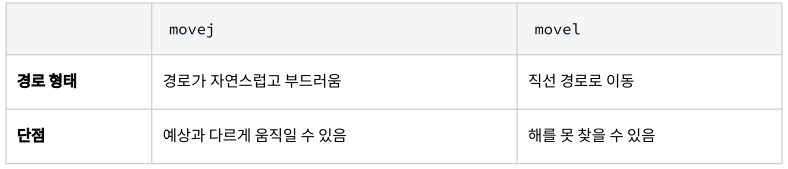

# 간단하게 cv2 테스트
* VideoCapture() 함수에 장비 경로를 입력 ("/dev/jetcocam0")
* 장치 확인은 터미널 창에 ls /dev 명령어 실행하면 디바이스 노드를 확인할 수 있다.

In [1]:
import cv2
# 캠 열기
cap = cv2.VideoCapture('/dev/jetcocam0')

# 캠이 정상적으로 열렸는지 확인
if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()
    
while True:
    # 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        print("프레임을 가져올 수 없습니다.")
        break
    
    # 화면에 출력
    cv2.imshow('Cam', frame)
    
    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# 캠 해제 및 창 닫기
cap.release()
cv2.destroyAllWindows()

### 이미지 저장

In [19]:
import cv2
import time
import os

# 저장 경로 설정
save_dir = "/home/jetcobot/dev_ws/pose_ArUco/calibration_checkerboard"

# 디렉토리가 없으면 생성
os.makedirs(save_dir, exist_ok=True)

# 캠 열기
cap = cv2.VideoCapture('/dev/jetcocam0')

# 캠이 정상적으로 열렸는지 확인
if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    # 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        print("프레임을 가져올 수 없습니다.")
        break

    # 화면에 출력
    cv2.imshow('Cam', frame)

    key = cv2.waitKey(1) & 0xFF

    # 'q' 키: 종료
    if key == ord('q'):
        break

    # 's' 키: 이미지 저장
    elif key == ord('s'):
        filename = f"capture_{time.strftime('%Y%m%d_%H%M%S')}.jpg"
        filepath = os.path.join(save_dir, filename)
        cv2.imwrite(filepath, frame)
        print(f"[저장 완료] {filepath}")

# 캠 해제 및 창 닫기
cap.release()
cv2.destroyAllWindows()


[저장 완료] /home/jetcobot/dev_ws/pose_ArUco/calibration_checkerboard/capture_20250711_174145.jpg
[저장 완료] /home/jetcobot/dev_ws/pose_ArUco/calibration_checkerboard/capture_20250711_174210.jpg
